# Prediction using Supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data is successfully imported")

Data is successfully imported


In [3]:
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


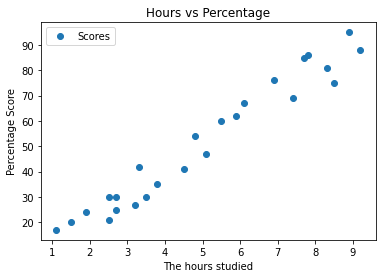

In [6]:
data.plot(x = 'Hours', y='Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('The hours studied')
plt.ylabel('Percentage Score')
plt.show()

In [17]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

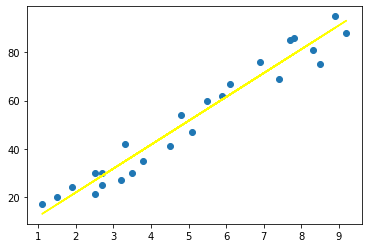

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'yellow');
plt.show()

In [23]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


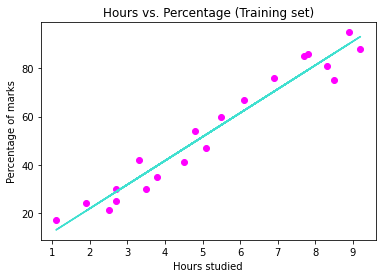

In [35]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'magenta')
plt.plot(X_train, regressor.predict(X_train), color = 'turquoise')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

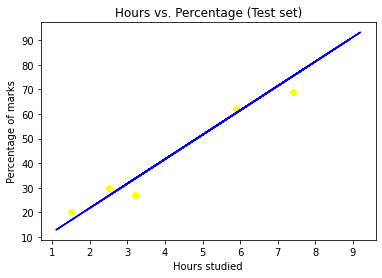

In [36]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [47]:
#Comparing the actual values with the predicted ones.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


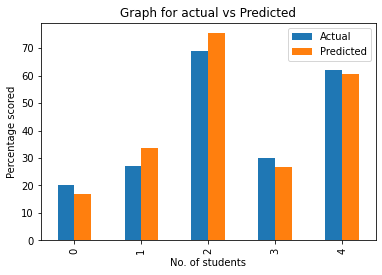

In [51]:
df.plot(kind = 'bar')
plt.title("Graph for actual vs Predicted")
plt.xlabel("No. of students")
plt.ylabel("Percentage scored")
plt.show()

In [49]:
data = np.array(9.25)
data = data.reshape(-1, 1)
pred = regressor.predict(data)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [93.69173249].


In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [41]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9454906892105355
